In [4]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN


In [5]:
# reading the data from json file
data = pd.read_json("traindata.json")

In [6]:
# information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         241 non-null    object        
 1   timestamp  241 non-null    datetime64[ns]
 2   latitude   241 non-null    float64       
 3   longitude  241 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 7.7+ KB


In [7]:
# displaying the data
data

,id,timestamp,latitude,longitude
0,Alice,2020-06-28 19:52:26,12.880172,77.784798
1,Alice,2020-06-28 20:52:26,12.993111,77.596512
2,Alice,2020-06-28 21:52:26,12.975756,77.463615
3,Alice,2020-06-28 22:52:26,12.974606,77.615150
4,Alice,2020-06-28 23:52:26,12.997514,77.706261
...,...,...,...,...
236,Judy,2020-06-29 14:52:26,13.064901,77.579422
237,Judy,2020-06-29 15:52:26,12.895975,77.532829
238,Judy,2020-06-29 16:52:26,12.935904,77.740227
239,Judy,2020-06-29 17:52:26,13.026723,77.576401


In [8]:
# counting the rows in dataset
data.duplicated().value_counts()

False    241
dtype: int64

In [9]:
# displaying the description of dataset
data.describe()

,latitude,longitude
count,241.000000,241.000000
mean,12.969013,77.624182
std,0.054117,0.106017
min,12.880172,77.445770
25%,12.924060,77.532829
50%,12.969007,77.623604
75%,13.010509,77.712913
max,13.068818,77.797501


In [10]:
# data of any instance in dataset
a=data[data.id=='Carol']
a.head()

,id,timestamp,latitude,longitude
49,Carol,2020-06-28 19:52:26,12.960289,77.744644
50,Carol,2020-06-28 20:52:26,12.971990,77.535370
51,Carol,2020-06-28 21:52:26,13.057900,77.519447
52,Carol,2020-06-28 22:52:26,13.060118,77.750587
53,Carol,2020-06-28 23:52:26,13.048756,77.766640


In [11]:
#displaying all unique names
data['id'].unique() 

array(['Alice', 'Bob', 'Carol', 'David', 'Erin', 'Frank', 'Grace',
       'Heidi', 'Ivan', 'Judy'], dtype=object)

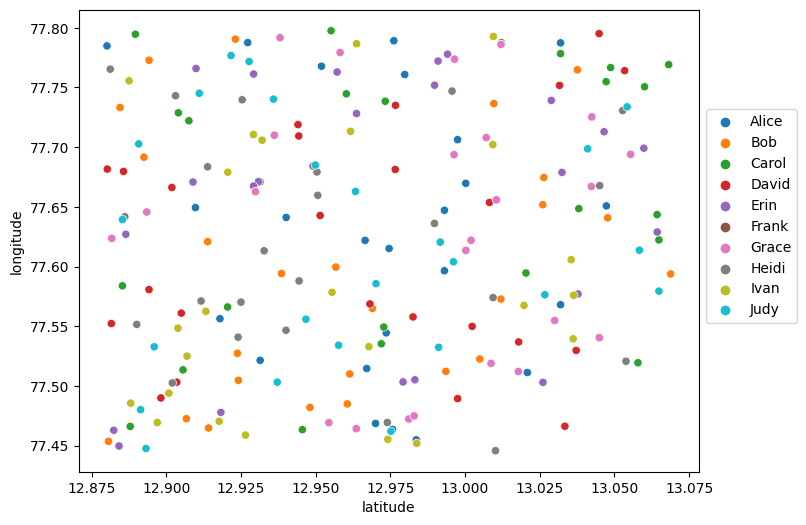

In [12]:
#plotting the figure based on longitude and latitude values
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=data, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8]) 

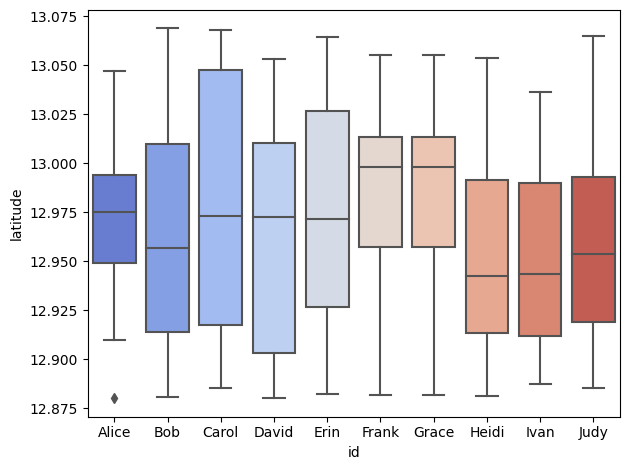

In [13]:
sns.boxplot(x= 'id' , y= 'latitude' , data= data , palette= 'coolwarm')
plt.tight_layout()

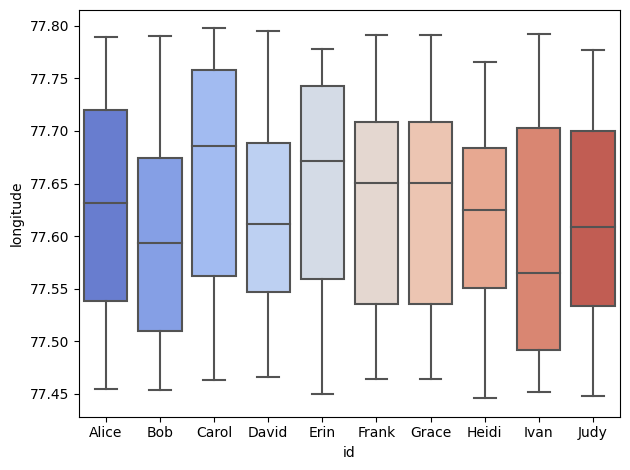

In [14]:
sns.boxplot(x= 'id' , y= 'longitude' , data= data , palette= 'coolwarm')
plt.tight_layout()

In [15]:
# creating the clustering model using DBSCAN
epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
model = DBSCAN(eps = epsilon, min_samples = 2, metric = 'haversine').fit(data[['latitude', 'longitude']])
data['cluster'] = model.labels_.tolist()

In [16]:
# number of objects in dataset
len(data['cluster'])

241

In [17]:
# displaying the data 
data

,id,timestamp,latitude,longitude,cluster
0,Alice,2020-06-28 19:52:26,12.880172,77.784798,-1
1,Alice,2020-06-28 20:52:26,12.993111,77.596512,-1
2,Alice,2020-06-28 21:52:26,12.975756,77.463615,0
3,Alice,2020-06-28 22:52:26,12.974606,77.615150,-1
4,Alice,2020-06-28 23:52:26,12.997514,77.706261,-1
...,...,...,...,...,...
236,Judy,2020-06-29 14:52:26,13.064901,77.579422,-1
237,Judy,2020-06-29 15:52:26,12.895975,77.532829,-1
238,Judy,2020-06-29 16:52:26,12.935904,77.740227,-1
239,Judy,2020-06-29 17:52:26,13.026723,77.576401,-1


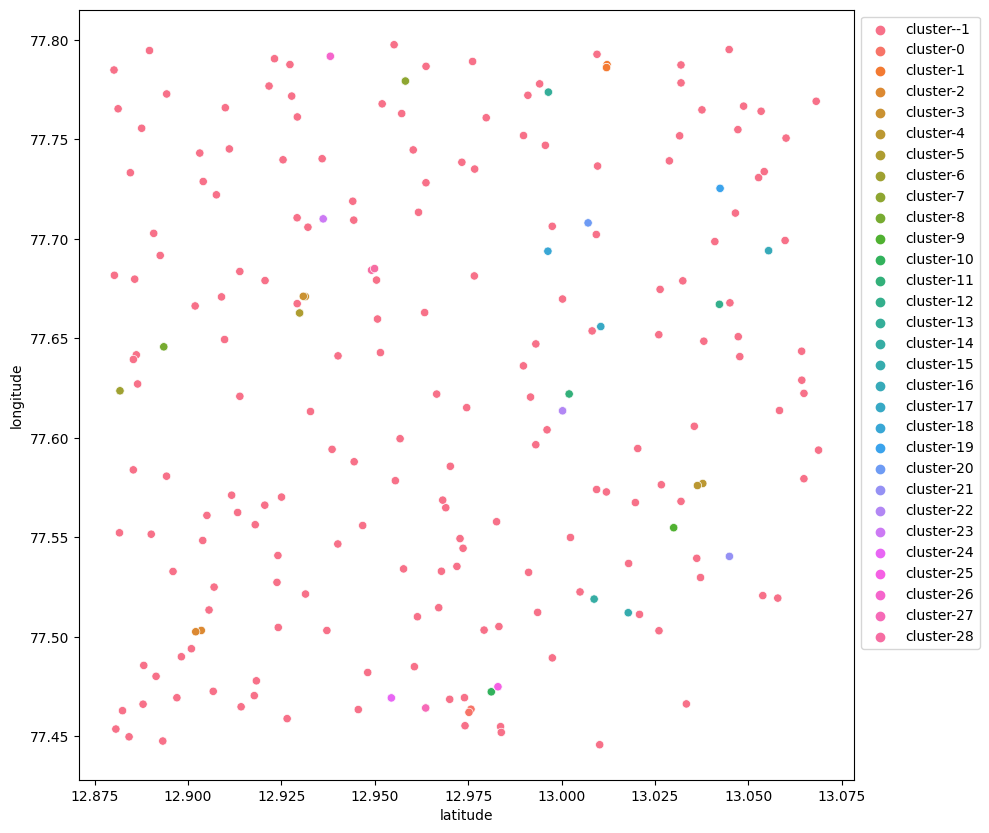

In [18]:
labels = model.labels_
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=data , x= 'latitude' , y= 'longitude' , hue= ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])

In [19]:
# get infected names
def get_infected_names(input_name):
    df = pd.read_json('traindata.json')
    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names

In [20]:
ans = get_infected_names('Frank')

In [25]:
print(len(ans))
print(ans)

2
['Grace', 'Carol']


In [ ]:
get_infected_names('David')

['Heidi']

In [ ]:
get_infected_names('Heidi')

['David', 'Judy']